In [2]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.patches as mpatches

## Import Data Set

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/mubaris/friendly-fortnight/master/xclara.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


## Plotting Dataset

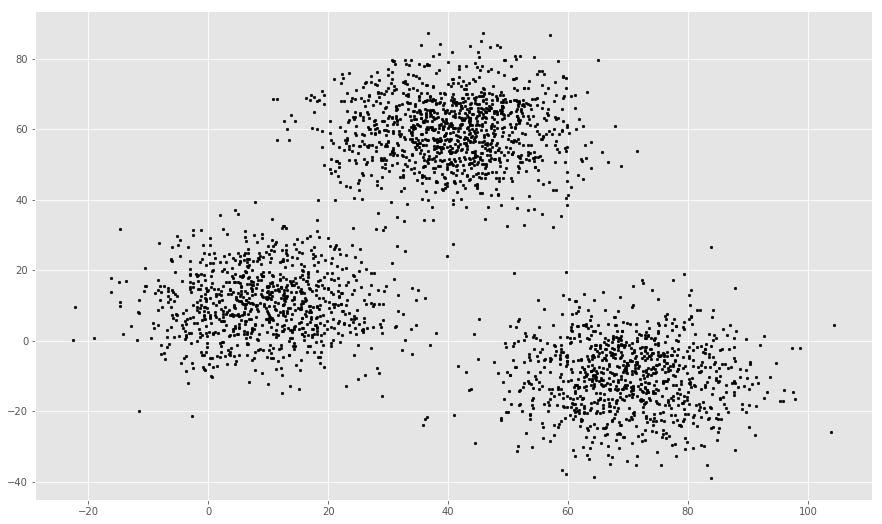

In [4]:
plt.rcParams['figure.figsize'] = (15, 9)
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

### Euclidean Distance Calculator

In [5]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

### Define Elements of K-means Algorithm

In [6]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[62. 18.]
 [76. 16.]
 [39. 29.]]


## Plot with Initial Centroids

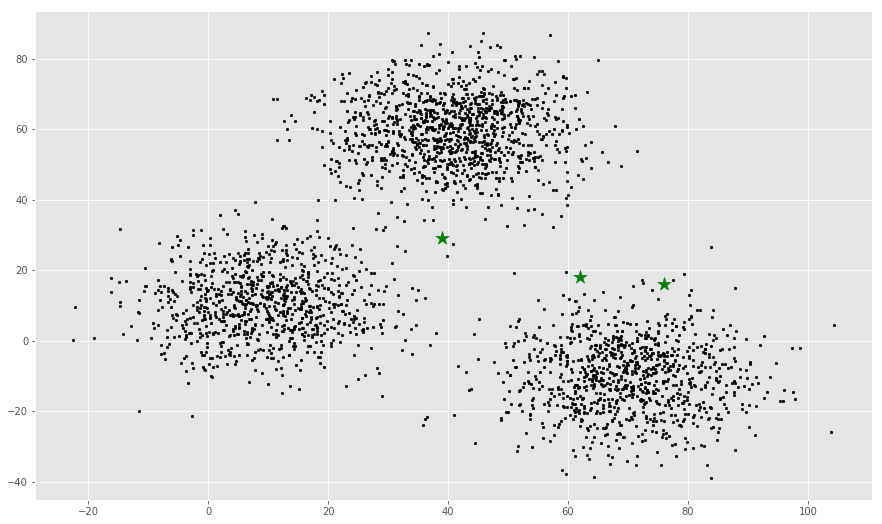

In [7]:
plt.scatter(f1, f2, c='black', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

### Store each centroid value as it updates

In [8]:
C_old = np.zeros(C.shape) #creates array of 0's that is the same shape as C (the centroids)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X)) #ceates array of 0's the length of the data (3000 in this case)
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero

count = 0
while error != 0:
    # Assigning each value to its closest cluster
    count += 1
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    print(count)


1
2
3
4
5
6
7
8
9


## Plot of Final Clusters

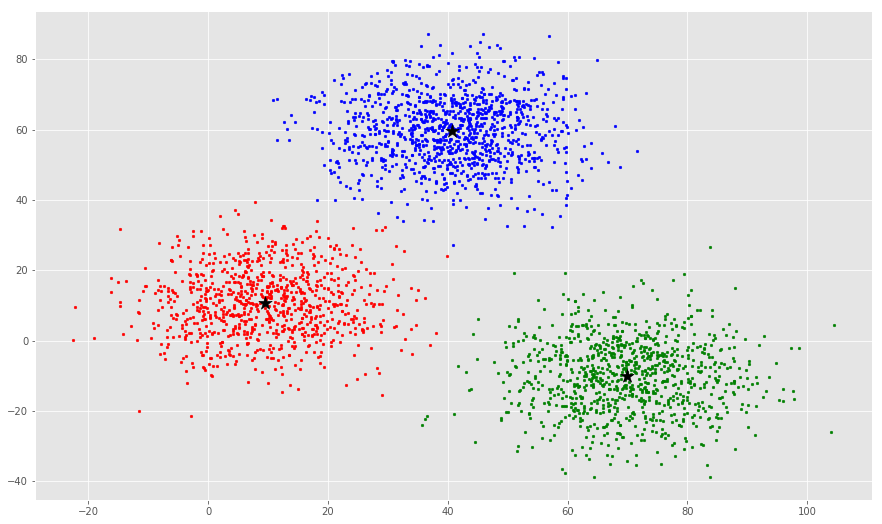

In [9]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')

# Using Sklearn Package

In [10]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("Scratch")
print(C) # From Scratch
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
Scratch
[[  9.478045  10.686052]
 [ 69.92419  -10.119641]
 [ 40.683628  59.715893]]
sklearn
[[  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]]


# With Breast Cancer Dataset

In [11]:
bcdata = pd.read_csv('Wisconsin_Breast_Cancers.csv', index_col=0)
print("Input Data and Shape")
print(bcdata.shape)
bcdata.head()

Input Data and Shape
(684, 10)


,Clump_Thickness,Size_Uniformity,Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


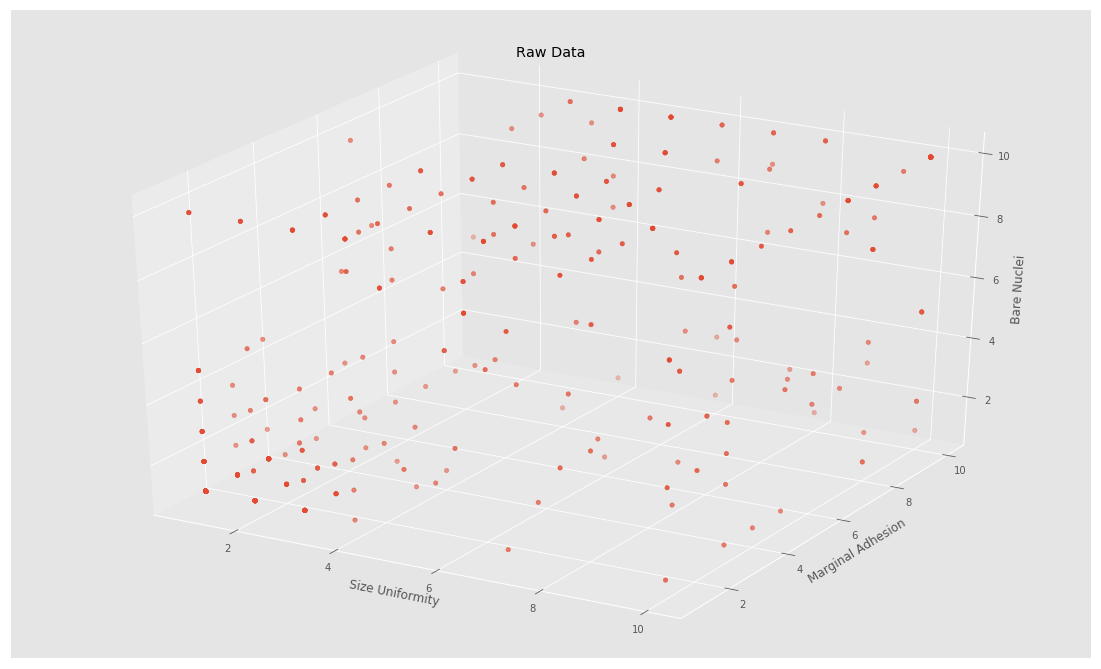

In [12]:
d1 = bcdata['Size_Uniformity'].values
d2 = bcdata['Marginal_Adhesion'].values
d3 = bcdata['Bare_Nuclei']
X1 = np.array(list(zip(d1, d2,d3)))

plt.rcParams['figure.facecolor']= 'white'
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2])
ax.set_title("Raw Data")
ax.set_xlabel("Size Uniformity")
ax.set_ylabel("Marginal Adhesion")
ax.set_zlabel("Bare Nuclei")
plt.savefig("WBC Raw.png", facecolor=fig.get_facecolor(), edgecolor='none', transparent=True)

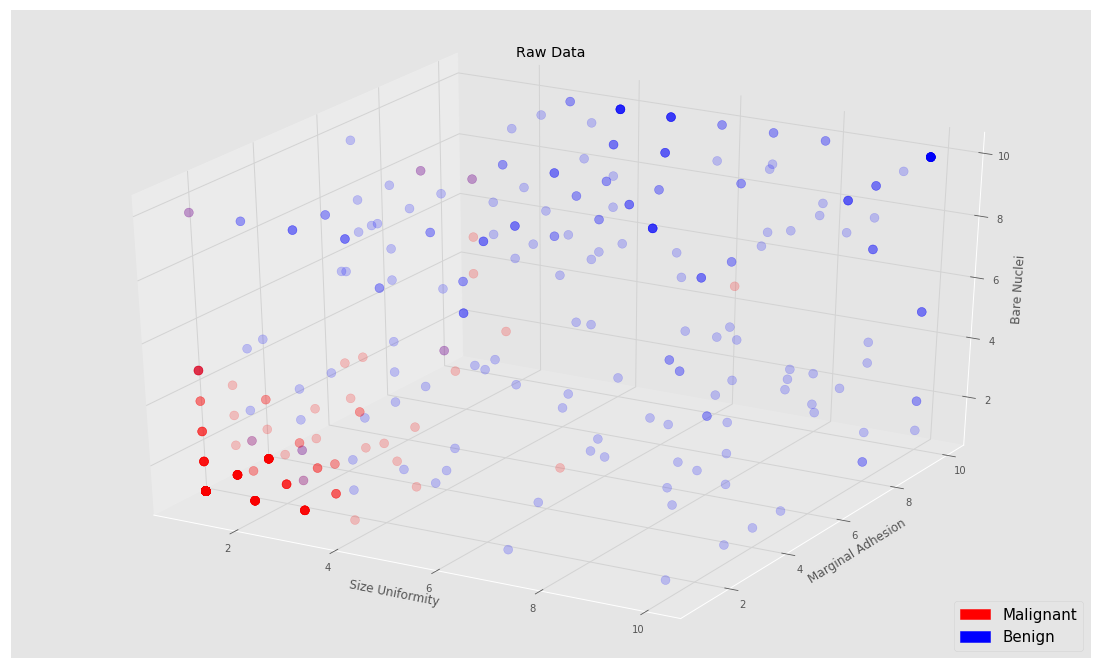

In [32]:
d4 = bcdata['Class'].values
Y = np.array(list(zip(d1, d2, d3, d4)))
df = pd.DataFrame(dict(d1 = d1, d2 = d2, d3 = d3, d4 = d4))
df["d4"] = df["d4"].astype("category")
colors2 = {2: "red", 4: "blue"}

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df["d1"], df["d2"], df["d3"], s = 80, c = df['d4'].apply(lambda x: colors2[x]), alpha= 0.2)
ax.set_title("Raw Data")
ax.xaxis._axinfo["grid"].update({"linewidth":1, "color" : "lightgray"})
ax.yaxis._axinfo["grid"].update({"linewidth":1, "color" : "lightgray"})
ax.zaxis._axinfo["grid"].update({"linewidth":1, "color" : "lightgray"})
ax.set_xlabel("Size Uniformity")
ax.set_ylabel("Marginal Adhesion")
ax.set_zlabel("Bare Nuclei")
red_patch = mpatches.Patch(color='red', label= 'Malignant')
blue_patch = mpatches.Patch(color='blue', label='Benign')
plt.legend(handles=[red_patch, blue_patch], loc=4, prop={'size': 15})
plt.savefig("WBC_colored_Raw.png", facecolor=fig.get_facecolor(), edgecolor='none', transparent = True)


## Determine k with Elbow Graph

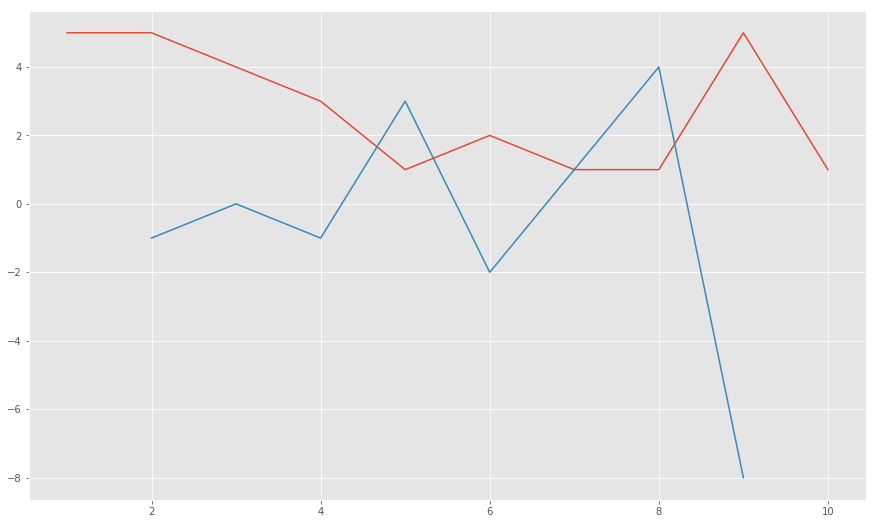

clusters: 8


In [16]:
last = X1[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k1 = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k1)

## Defining Elements of k-means Algorithm

In [21]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k1= 5
# X coordinates of random centroids
C_x1 = np.random.randint(0, np.max(X1), size=k1)
# Y coordinates of random centroids
C_y1 = np.random.randint(0, np.max(X1), size=k1)
# Z coordinates of random centroids
C_z1 = np.random.randint(0, np.max(X1), size=k1)
C1 = np.array(list(zip(C_x1, C_y1, C_z1)), dtype=np.float32)
print("Initial Centroids")
print(C1)

Initial Centroids
[[0. 9. 4.]
 [4. 0. 8.]
 [9. 0. 0.]
 [4. 2. 1.]
 [4. 3. 9.]]


## Plot with initial centroids

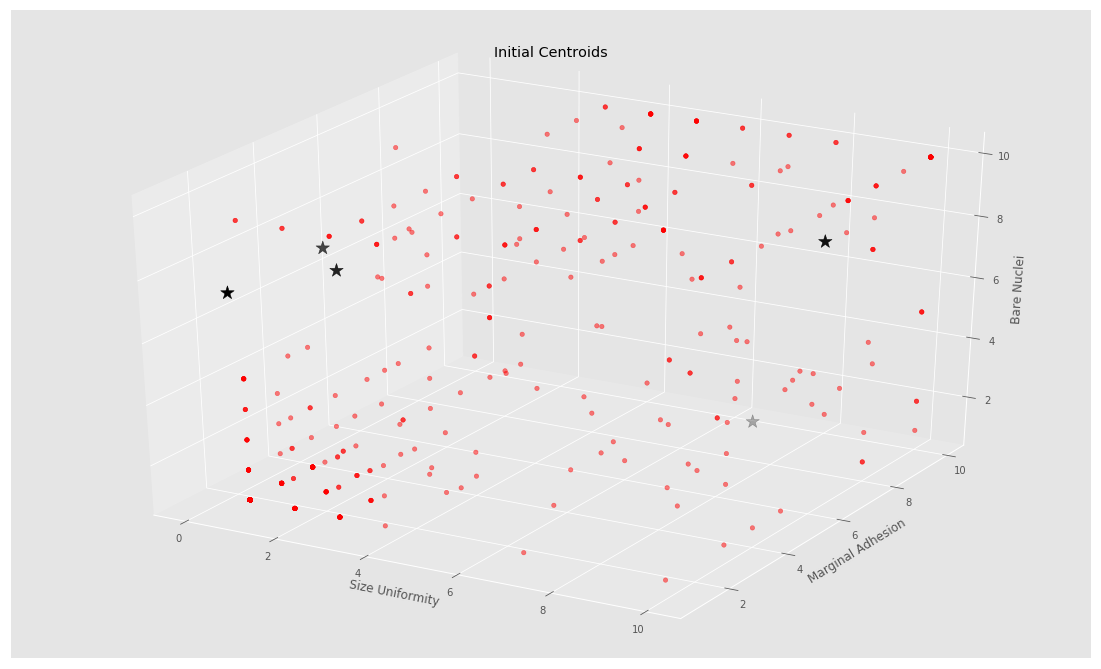

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
plt.rcParams['figure.facecolor']= 'white'
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c='red', alpha=0.5)
ax.scatter(C1[:, 0], C1[:, 1], C1[:, 2], marker="*", s=200, c='black')
ax.set_title("Initial Centroids")
ax.set_xlabel("Size Uniformity")
ax.set_ylabel("Marginal Adhesion")
ax.set_zlabel("Bare Nuclei")
plt.savefig("WBC_InitCentr.png", facecolor=fig.get_facecolor(), edgecolor='none', transparent=True)

## K-means Algorithm Loop

In [25]:
C_old1 = np.zeros(C1.shape) #creates array of 0's that is the same shape as C (the centroids)
# Cluster Lables(0, 1, 2)
clusters1 = np.zeros(len(X1)) #ceates array of 0's the length of the data (3000 in this case)
# Error func. - Distance between new centroids and old centroids
error1 = dist(C1, C_old1, None)
# Loop will run till the error becomes zero

In [15]:
count = 0
while error1 != 0:
    # Assigning each value to its closest cluster
    count += 1
    for i in range(len(X1)):
        distances1 = dist(X1[i], C1)
        cluster1 = np.argmin(distances1)
        clusters1[i] = cluster1
    # Storing the old centroid values
    C_old1 = deepcopy(C1)
    # Finding the new centroids by taking the average value
    for i in range(k1):
        points1 = [X1[j] for j in range(len(X1)) if clusters1[j] == i]
        C1[i] = np.mean(points1, axis=0)
    error = dist(C1, C_old1, None)
    print(count)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: 

## Using Sklearn Package

In [26]:
# Initializing KMeans
kmeans = KMeans(n_clusters=5)
# Fitting with inputs
kmeans = kmeans.fit(X1)
# Predicting the clusters
labels = kmeans.predict(X1)
# Getting the cluster centers
C1 = kmeans.cluster_centers_
print(C1)

[[5.69662921 3.02247191 8.98876404]
 [1.33041575 1.3238512  1.32166302]
 [8.58333333 6.0625     3.125     ]
 [4.83673469 8.40816327 9.67346939]
 [9.65853659 8.80487805 9.70731707]]


## Plot of Final Clusters

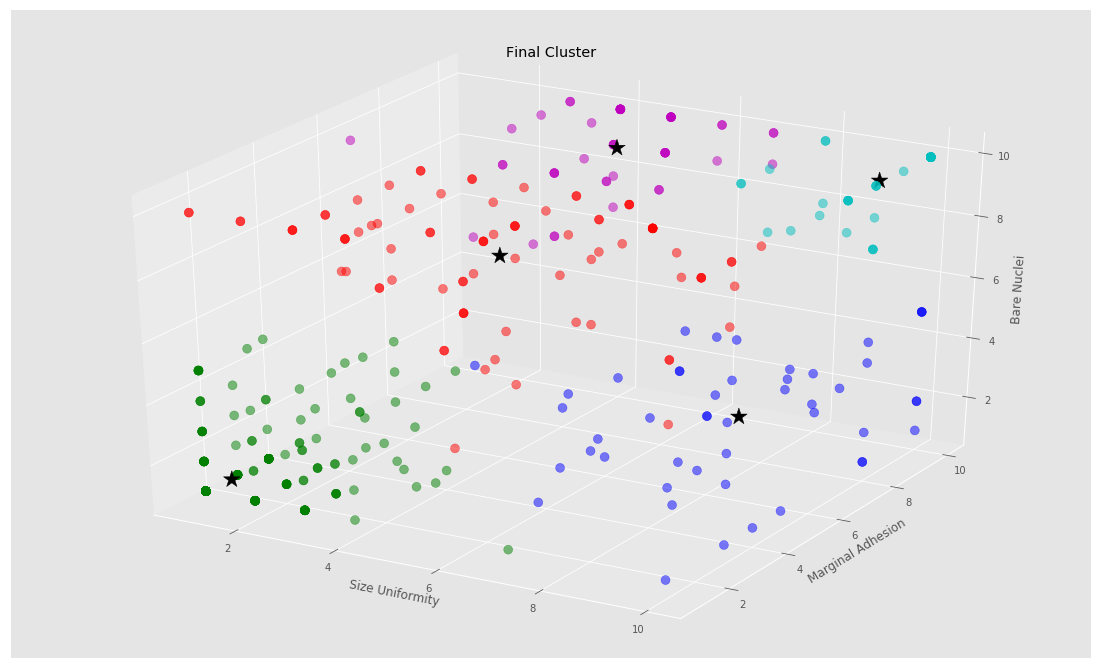

In [27]:
for i in range(len(X1)):
        distances = dist(X1[i], C1)
        cluster = np.argmin(distances)
        clusters1[i] = cluster
        
for i in range(k1):
        points1 = [X1[j] for j in range(len(X1)) if clusters1[j] == i]
        C1[i] = np.mean(points1, axis=0)      

plt.rcParams['figure.facecolor']= 'white'
colors = ['r', 'g', 'b', 'm', 'c', 'yellow', 'pink', 'orange', 'k']
fig = plt.figure()
ax = Axes3D(fig)
for i in range(k1):
        points1 = np.array([X1[j] for j in range(len(X1)) if clusters1[j] == i])
        ax.scatter(points1[:, 0], points1[:, 1], points1[:, 2], marker='o', s=80, c=colors[i], alpha=0.5)    
ax.scatter(C1[:, 0], C1[:, 1], C1[:, 2], marker='*', s=300, c='black', alpha=1)
ax.set_title("Final Cluster")
ax.set_xlabel("Size Uniformity")
ax.set_ylabel("Marginal Adhesion")
ax.set_zlabel("Bare Nuclei")
plt.savefig("WBC_5Clust.png", facecolor=fig.get_facecolor(), edgecolor='none', transparent=True)

In [28]:
unique, counts = np.unique(clusters1, return_counts=True)
dict(zip(unique, counts))

{0.0: 89, 1.0: 457, 2.0: 48, 3.0: 49, 4.0: 41}

## Cluster Cancer Data by Diagnosis

In [29]:
k2 = 2
# Initializing KMeans
kmeans2 = KMeans(n_clusters=2)
# Fitting with inputs
kmeans2 = kmeans2.fit(X1)
# Predicting the clusters
labels2 = kmeans2.predict(X1)
# Getting the cluster centers
C2 = kmeans2.cluster_centers_
print(C2)

[[1.38744589 1.34848485 1.32683983]
 [6.84234234 5.92342342 8.16666667]]


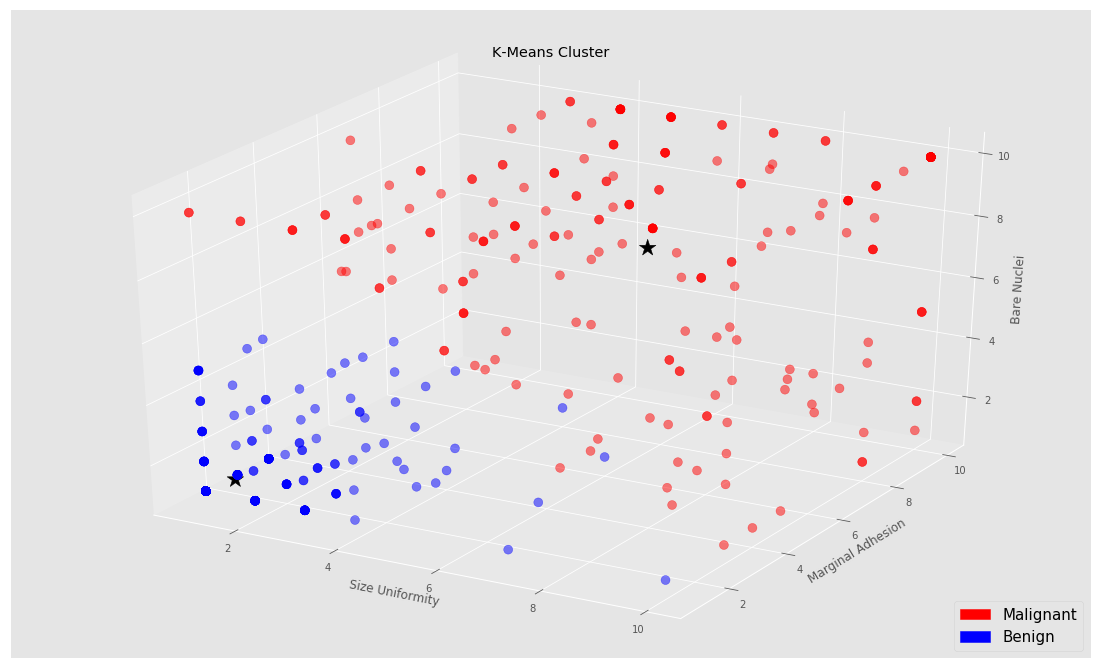

In [30]:
C_old2 = np.zeros(C2.shape) #creates array of 0's that is the same shape as C (the centroids)
# Cluster Lables(0, 1, 2)
clusters2 = np.zeros(len(X1)) #ceates array of 0's the length of the data (3000 in this case)
# Error func. - Distance between new centroids and old centroids

for i in range(len(X1)):
        distances2 = dist(X1[i], C2)
        cluster2 = np.argmin(distances2)
        clusters2[i] = cluster2
        
for i in range(k2):
        points2 = [X1[j] for j in range(len(X1)) if clusters2[j] == i]
        C2[i] = np.mean(points2, axis=0)      

plt.rcParams['figure.facecolor']= 'white'
colors = ['b', 'r', 'g', 'm', 'c', 'yellow', 'pink', 'orange', 'k']
fig2 = plt.figure()
ax = Axes3D(fig2)
for i in range(k2):
        points2 = np.array([X1[j] for j in range(len(X1)) if clusters2[j] == i])
        ax.scatter(points2[:, 0], points2[:, 1], points2[:, 2], marker='o', s=80, c=colors[i], alpha=0.5)    
ax.scatter(C2[:, 0], C2[:, 1], C2[:, 2], marker='*', s=300, c='black', alpha=1)
ax.set_title("K-Means Cluster")
ax.set_xlabel("Size Uniformity")
ax.set_ylabel("Marginal Adhesion")
ax.set_zlabel("Bare Nuclei")
red_patch = mpatches.Patch(color='red', label= 'Malignant')
blue_patch = mpatches.Patch(color='blue', label='Benign')
plt.legend(handles=[red_patch, blue_patch], loc=4, prop={'size': 15})
plt.savefig("WBC_2Clust.png", facecolor=fig.get_facecolor(), edgecolor='none', transparent=True)

In [31]:
unique, counts = np.unique(clusters2, return_counts=True)
dict(zip(unique, counts))

{0.0: 462, 1.0: 222}

# Another Example

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=3)

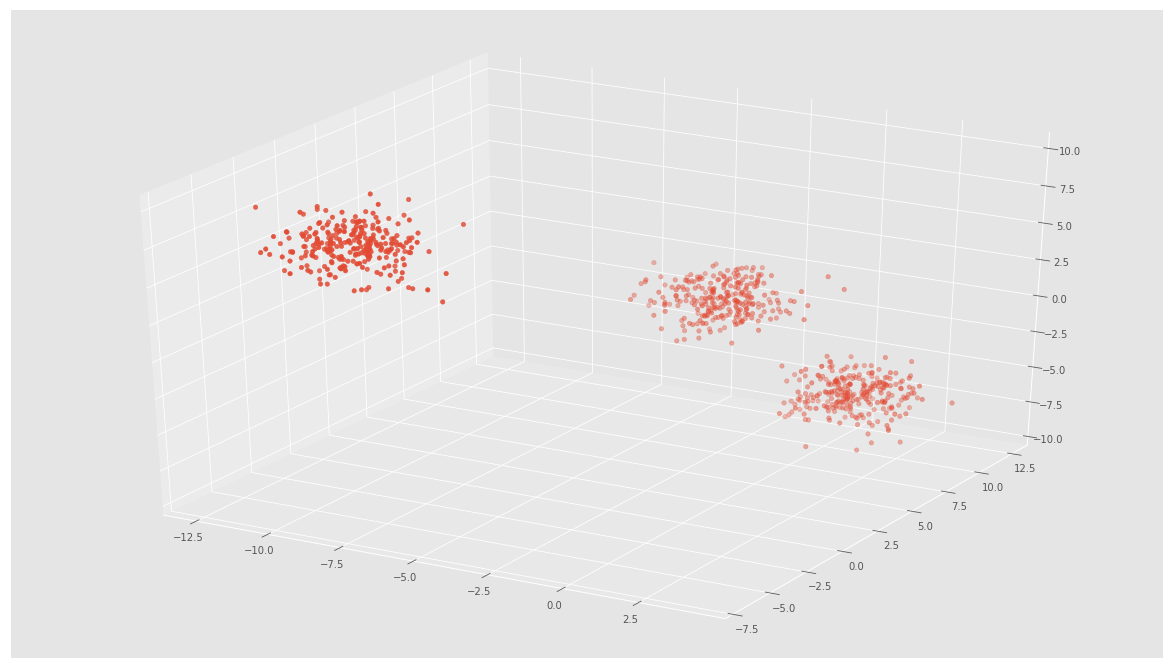

In [56]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [57]:
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

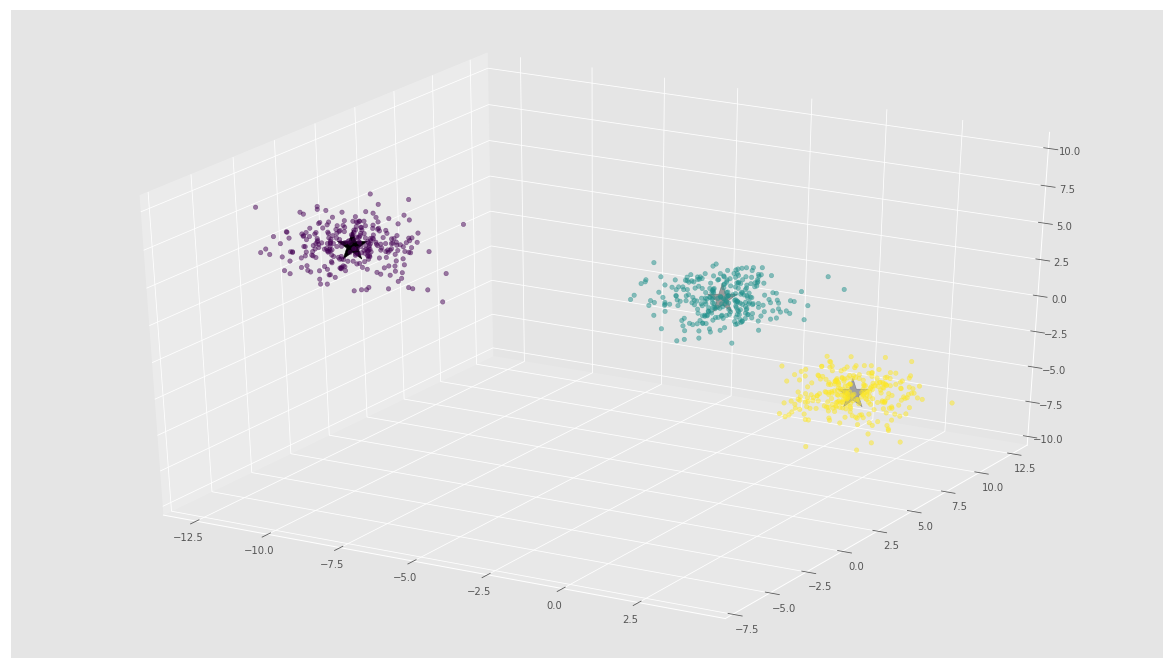

In [58]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, alpha= 0.5)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='black', s=1000)